In [83]:
import os
#os.chdir('/Users/ahmedghazaly/projects/qa_tools')
import pandas as pd
os.environ['QAD_PORT'] = '1452'
os.environ['QAD_PASSWORD'] = 'dfQ4dD3vR34derR3d!'
os.environ['QAD_USER'] = 'df_qad_reader_dev'
from db_tools import databases, get_db
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
oil = pd.read_csv('estimatesoil.csv').set_index('PerEndDate')
oil.index = pd.to_datetime(oil.index)

In [127]:
estimatedexp = oil[(oil.Measure == 20) & (oil.IBESTicker == 'AXAS')][['DefMeanEst', 'DefHighEst', 'DefLowEst']]

In [159]:
query = """
SELECT IBESTicker, PerEndDate, DefActValue, DefScale, UnitType from

(select estpermid permid, IBESTicker FROM qai.dbo.treinfo where IBESTicker IN ('AXAS')) a

join qai.dbo.TREActRpt b on a.permid = b.estpermid where Measure IN ('20') --Exploration expenses
AND PerEndDate > '2000' and PerType = '3' order by PerEndDate ASC

"""

qad = get_db(databases.qad)
exp = qad.query_to_df(query).set_index('PerEndDate')

Connecting to MS SQL database...


In [134]:
data = pd.merge(estimatedexp, exp, how='outer', left_index=True, right_index=True)

In [137]:
estimates = pd.read_csv('estimatesoil2.csv').set_index('PerEndDate')
estimates.index = pd.to_datetime(estimates.index)
axasrev = estimates[(estimates.Measure == 20) & (estimates.IBESTicker == 'AXAS')]
axasprod = estimates[(estimates.Measure == 151) & (estimates.IBESTicker == 'AXAS')]

In [138]:
data2 = pd.merge(exp, axasrev, how='inner', left_index=True, right_index=True )

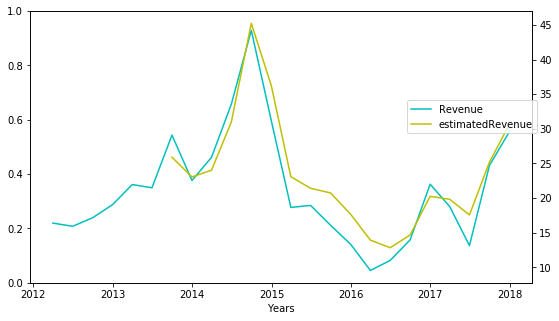

In [164]:
plt.rcParams["figure.figsize"] = (9,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
# ax1.plot(data.index, data.DefActValue, 'r-', label='Actuals')
# plt.legend(loc=(.75,.35));

# ax1.plot(axasprod.index, axasprod.DefMeanEst, 'b-', label='Estimates')
# plt.legend(loc=(.75,.25));

ax2 = ax1.twinx()
ax2.plot(exp.loc['2012-03-31':].index, exp.DefActValue.loc['2012-03-31':], 'c-', label='Revenue')
plt.legend(loc=(.75,.45));

# ax2 = ax1.twinx()
ax2.plot(data2.index, data2.DefMeanEst, 'y-', label='estimatedRevenue')
plt.legend(loc=(.75,.55));

In [162]:
exp.tail()

IBESTicker  DefActValue   DefScale  UnitType
PerEndDate                                             
2016-12-31       AXAS       22.007  1000000.0  Currency
2017-03-31       AXAS       18.787  1000000.0  Currency
2017-06-30       AXAS       13.152  1000000.0  Currency
2017-09-30       AXAS       24.722  1000000.0  Currency
2017-12-31       AXAS       29.588  1000000.0  Currency

In [158]:
data2[['DefMeanEst']].tail(10)

DefMeanEst
PerEndDate            
2015-09-30    20.74480
2015-12-31    17.68000
2016-03-31    13.94275
2016-06-30    12.84233
2016-09-30    14.68556
2016-12-31    20.25729
2017-03-31    19.83240
2017-06-30    17.57600
2017-09-30    25.19400
2017-12-31    30.67167

In [72]:
# oilquery = """

# select * from (
# SELECT EstPermID permid, IBESTicker FROM qai.dbo.TREInfo) a
# JOIN qai.dbo.TRESumPer b ON a.permid = b.EstPermID AND Measure IN
# ('20','9','8','101','103','151','164','165','166','248','250',
# '253','254','255','320','336','337','338','342','355','362','387')
# AND PerEndDate > '2000' and PerType = '3'
# AND ExpireDate IS NULL
# ORDER BY PerEndDate

# """

# qad = get_db(databases.qad)
# estimates = qad.query_to_df(oilquery).set_index('PerEndDate')

Connecting to MS SQL database...


In [77]:
estimates = pd.read_csv('estimatesoil2.csv').set_index('PerEndDate')
estimates.index = pd.to_datetime(estimates.index)

In [74]:
plt.rcParams["figure.figsize"] = (9,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.plot(estimates.index, estimates.DefActValue, 'r-', label='Actuals')
plt.legend(loc=(.6,.65));

ax1.plot(estimates.index, estimates.DefMeanEst, 'b-', label='Estimates')
plt.legend(loc=(.6,.65));

array([  9,  20,   8, 103, 101, 151, 164, 165, 166, 255, 253, 254, 250,
       248, 336, 338, 337])